# Thermal Physics - Homework 10
> Alfaifi, Ammar - 201855360

In [156]:
from math import comb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Math
from scipy import constants as con
from scipy.integrate import quad
from scipy.optimize import curve_fit
from matplotlib_inline.backend_inline import set_matplotlib_formats

set_matplotlib_formats('pdf')
plt.rcParams |= {
    'text.usetex': True,
    'figure.figsize': (10, 4)
}
sns.set_theme()
set_matplotlib_formats('svg', 'pdf')

## Question 1
The change in pressure is 
$$
 P_2 - P_1 = \rho g \Delta{h}
$$
And also is given by
$$
 P_2 - P_1 = \frac{n_B RT}{V}
$$
Combine those two,
$$
    \rho g \Delta{h} = \frac{n_B RT}{V}
$$

By definition number of solute moles equals the mass of the solute per molecular weight, $n_B = m/M$, so
$$
    \rho g \Delta{h} = \frac{m RT}{VM}
$$

The concentration $c$ equals the mass divided by the volume of the solution,
$$
    c = \frac{\rho g M}{RT} \delta{h}
$$
Now for the given data we plot them to find the best-fit line's slop.

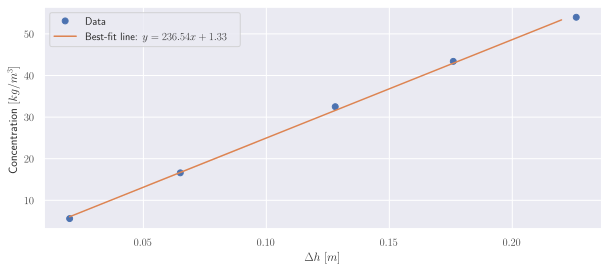

In [18]:
dh = np.array([2.0, 6.5, 12.8, 17.6, 22.6]) / 100
c = np.array([5.6, 16.6, 32.5, 43.4, 54.0]) * 1
dh_range = np.arange(dh[0], dh[-1], 0.1)
m, b = np.polyfit(dh, c, deg=1)

plt.plot(dh, c, 'o', label='Data')
plt.plot(dh_range, m * dh_range + b, label=f'Best-fit line: $y={m:.2f}x + {b:.2f}$')
plt.xlabel(r'$\Delta{h}$ $[m]$')
plt.ylabel(r'Concentration $[kg/m^3]$')
plt.legend()
plt.show()

So we conclude that 
$$
    \frac{\rho g M}{RT} = 236.54 \quad \Rightarrow \quad
        M = 236.54 \frac{RT}{\rho g} = 236.54 \frac{R \cdot 276.15}{997 * 9.8}
$$
So we have

In [59]:
T = con.convert_temperature(3, 'c', 'k')
Math(r'\frac{\rho g M}{RT}=%.2f' % (m * con.R * T / 997 / 9.8))

<IPython.core.display.Math object>

## Question 3
### (a)
For simplification we define $v_0 = \sqrt{2kT/m}$, where $T=300$ K and atomic mass of nitrogen is 28u. So

In [147]:
m = 28 * con.atomic_mass
v0 = np.sqrt(2 * 300 * con.k / m)
Math(r'v_0 = v_{max}= \sqrt{\frac{2kT}{m}} = %.2f' % v0)

<IPython.core.display.Math object>

### (b)

In [131]:
# Define maxwell speed distribution
def maxwell_dist(v, t=1, v0=v0):
    """ `t` is multiple of 300K"""
    return (4 / np.sqrt(np.pi) * v**2 / v0**3
        * t**(-3/2) * np.exp(- v**2 / v0**2 / t))

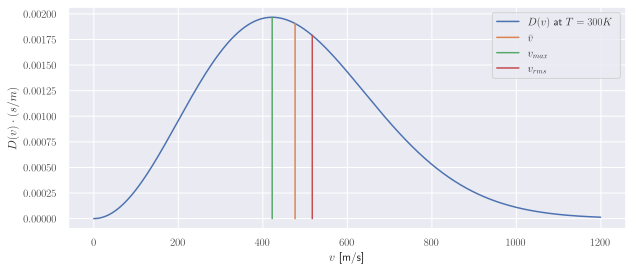

In [145]:
vel_range = np.arange(0, 1200)
v_max = v0
v_avg = np.sqrt(8 * con.k * 300 / np.pi / m)
v_rms = np.sqrt(3 * 300 * con.k / m)

plt.plot(vel_range, maxwell_dist(vel_range, 1), label='$D(v)$ at $T=300K$')
plt.plot([v_avg]*2,[0, maxwell_dist(v_avg)], label=r'$\bar{v}$')
plt.plot([v_max]*2,[0, maxwell_dist(v_max)], label=r'$v_{max}$')
plt.plot([v_rms]*2,[0, maxwell_dist(v_rms)], label=r'$v_{rms}$')
plt.ylabel(r'$D(v) \cdot (s/m)$')
plt.xlabel(f'$v$  [m/s]')
plt.legend()
plt.show()

### (c)
We I use the Python `quad` to integrate numerically the `maxwell_dist` function.

In [130]:
print('Probability of finding a nitrogen molecule with speed'
f' between 300 and 572 is {quad(maxwell_dist, 1, 572)[0]:.2f}')

Probability of finding a nitrogen molecule with speed between 300 and 572 is 0.70


## Question 4
### (b)

We find first the second derivative of $Z$ with respect to $\beta$
$$
    \frac{\partial^2 ~}{\partial \beta ^2} = \frac{\partial ^2}{\partial \beta ^2} 
        \sum_s e^{-\beta E(s)} = \sum_s \frac{\partial}{\partial \beta} [- E(s) e^{\beta E(s)}]
        = \sum_s [E(s)]^2 e ^{\beta E(s)}
$$

$$
    = Z \cdot \sum_s [E(s)]^2 \, \frac{e^{-\beta E(s)}}{Z} = Z \cdot \bar{E^2}
$$

Now using result from Problem 6.16 twice:

$$
    \bar{E^2} = \frac{1}{Z} \frac{\partial}{\partial \beta} 
        \left( \frac{\partial Z}{\partial \beta} \right) = \frac{1}{Z} 
            \frac{\partial}{\partial \beta} (- Z \bar{E}) = -\frac{1}{Z} 
            \left( \frac{\partial \bar{E}}{\partial \beta} Z + \bar{E}\frac{\partial Z}{\partial \beta} \right) \\
= \frac{\partial \bar{E}}{\partial \beta} + (\bar{E})^2
$$

### (a)
Or
$$
    \bar{E^2} - (\bar{E})^2 = - \frac{\partial \bar{E}}{\partial \beta}
    = - \frac{\partial T}{\partial \beta} \frac{\partial \bar{E}}{\partial \beta}
$$

But $\partial T / \partial \beta = (\partial \beta / \partial T)^{-2}= -k T^2$, while
$\partial \bar{E}/ \partial T$ is just the heat capacity at constant volume, $C_V$, then
$$
    \sigma_E^2 = \bar{E^2} - (\bar{E})^2 = kT^2 C_V
$$

### (c)
or 
$$
    \sigma_E = kT \sqrt{\frac{C_V}{k}}
$$

## Question 5

Suppose we have an isolated Einstein solid composed of 200 oscillators with a total of 200
units of energy. We take 1 oscillator as the system and the rest as the reservoir, with $\epsilon=1$ 

### (a)

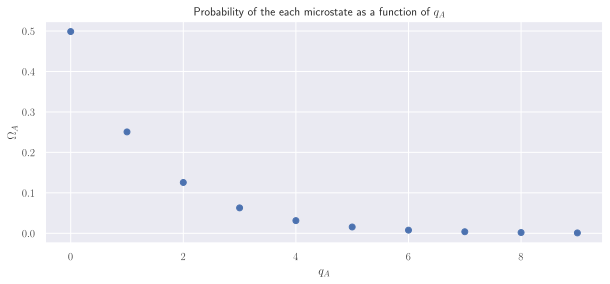

In [163]:
N_A = 1; N_B = 199
N = N_A + N_B
q_total = 200

q_A = np.arange(0, q_total+1)
q_B = q_A[::-1]

omega_A = np.array([float(comb(q + N_A - 1, q)) for q in q_A])
omega_B = np.array([float(comb(q + N_B - 1, q)) for q in q_B])
omega_total = omega_A * omega_B
prob = omega_total / np.sum(omega_total)

plt.title('Probability of the each microstate as a function of $q_A$')
plt.xlabel('$q_A$')
plt.ylabel('$\Omega_A$')
plt.plot(q_A[:10], prob[:10], 'o')
plt.show()

### (b)
We use `curve_fit` to fit the general exponential form
$$
    y = A\, e^{Bx}
$$

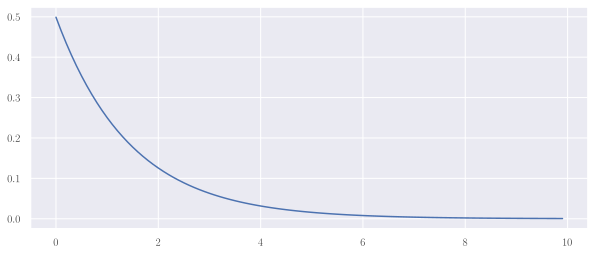

In [164]:
x, y = q_A[:10], prob[:10]

def gen_exp(x, a, b):
    return a * np.exp(b * x)

(A, B), error = curve_fit(gen_exp,  x,  y)
x = np.arange(0, 10, 0.1)

plt.plot(x, gen_exp(x, A, B))
plt.show()

### (d)
Repeat (a) through (b) but with 2,000 energy units, plotting up to 100 on $x$-axis.

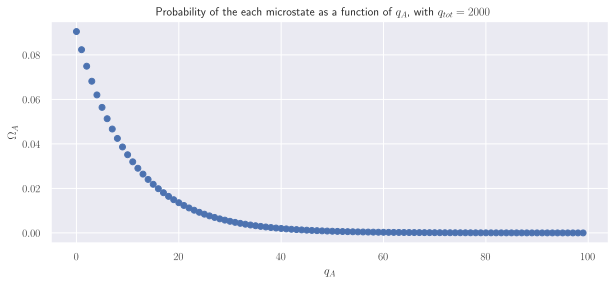

In [166]:
q_total = 2000

q_A = np.arange(0, q_total+1)
q_B = q_A[::-1]

omega_A = np.array([float(comb(q + N_A - 1, q)) for q in q_A])
omega_B = np.array([float(comb(q + N_B - 1, q)) for q in q_B])
omega_total = omega_A * omega_B
prob = omega_total / np.sum(omega_total)

plt.title(r'Probability of the each microstate as a function of $q_A$, with $q_{tot}=2000$')
plt.xlabel('$q_A$')
plt.ylabel('$\Omega_A$')
plt.plot(q_A[:100], prob[:100], 'o')
plt.show()

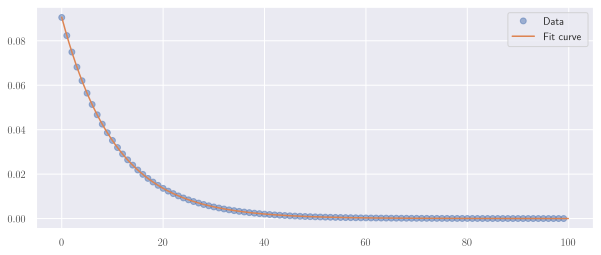

In [173]:
x, y = q_A[:100], prob[:100]

(A, B), error = curve_fit(gen_exp,  x,  y, p0=(0, prob[0]))
x = np.arange(0, 100, 0.1)

plt.plot(q_A[:100], prob[:100], 'o', label='Data', alpha=0.5)
plt.plot(x, gen_exp(x, A, B), label='Fit curve')
plt.legend()
plt.show()